In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
df = pd.read_csv("data.csv")
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


# EDA

In [76]:
df.shape

(381109, 12)

In [77]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [78]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [79]:
value_counts = df['Response'].value_counts()
value_counts

Response
0    334399
1     46710
Name: count, dtype: int64

Text(0, 0.5, 'Count')

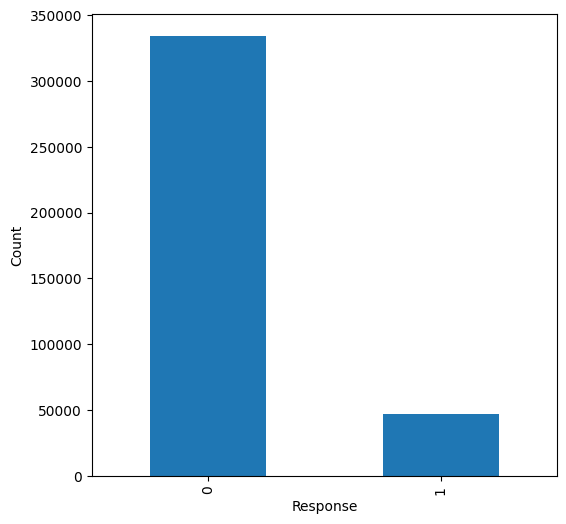

In [80]:
plt.figure(figsize=(6,6))
value_counts.plot(kind='bar')
plt.xlabel('Response')
plt.ylabel('Count')

<Axes: >

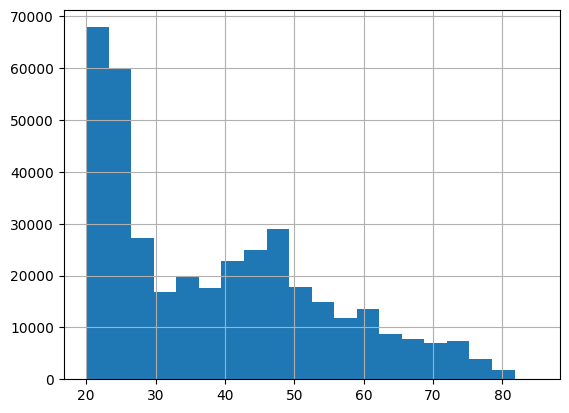

In [81]:
df['Age'].hist(bins=20)

In [82]:
gender_data = df['Gender'].value_counts()
gender_data

Gender
Male      206089
Female    175020
Name: count, dtype: int64

Text(0, 0.5, 'Count')

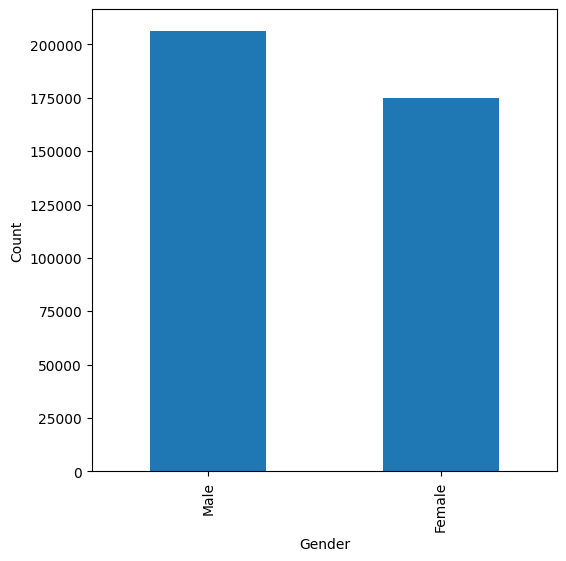

In [83]:
plt.figure(figsize=(6,6))
gender_data.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Count')

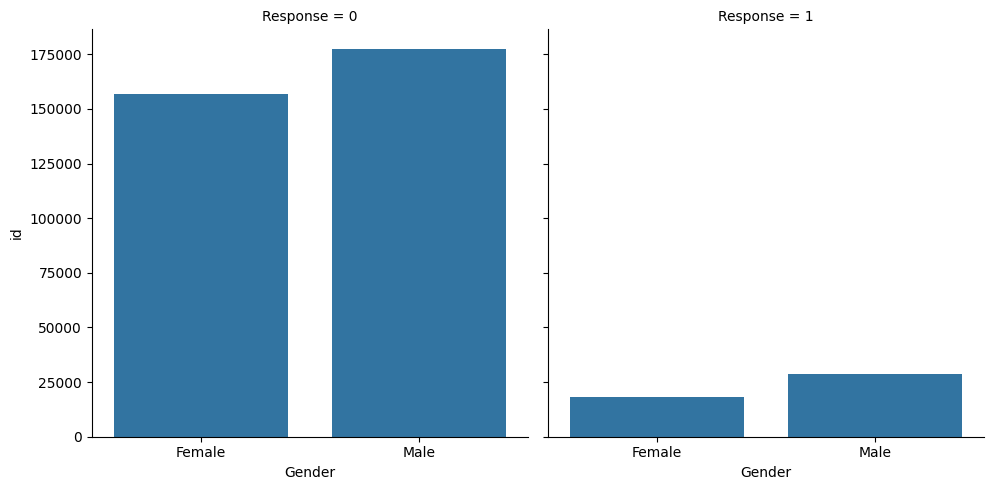

In [84]:
sns.catplot(data=df.groupby(['Response', 'Gender'])['id'].count().to_frame(), kind='bar', x='Gender', y='id', col='Response')

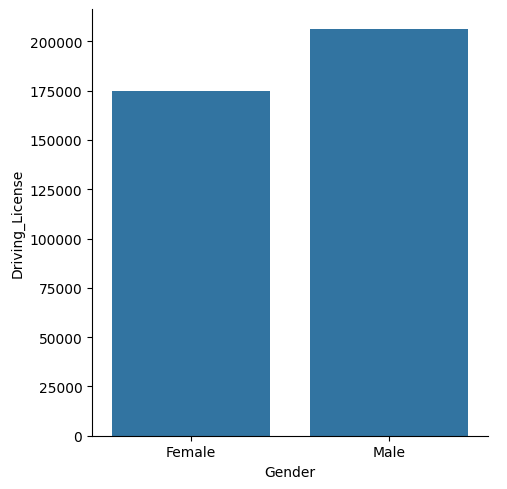

In [85]:
sns.catplot(data=df.groupby(['Gender'])['Driving_License'].count().to_frame(), kind='bar', x='Gender', y='Driving_License')

<Axes: xlabel='Previously_Insured', ylabel='count'>

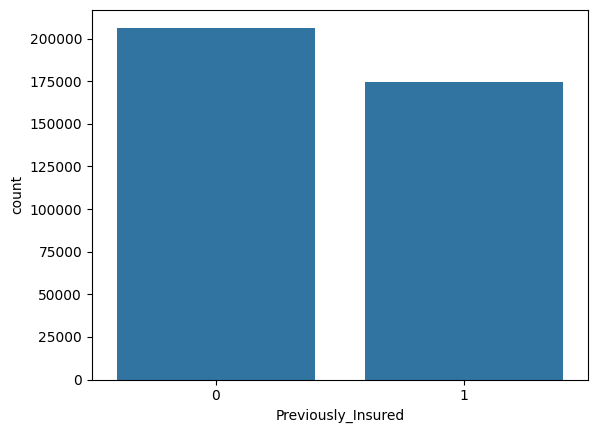

In [86]:
sns.countplot(x='Previously_Insured', data=df)

<Axes: xlabel='Vehicle_Age', ylabel='count'>

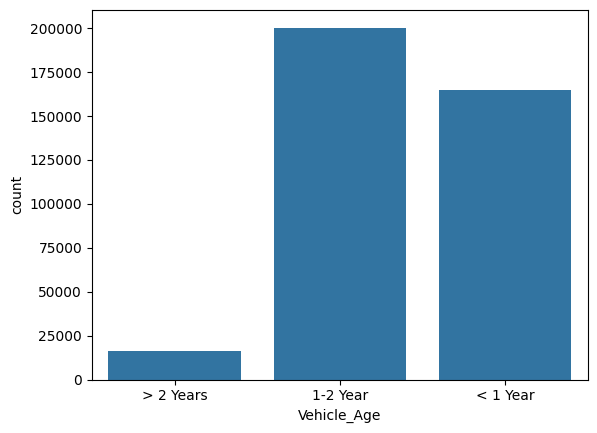

In [87]:
sns.countplot(x='Vehicle_Age', data=df)

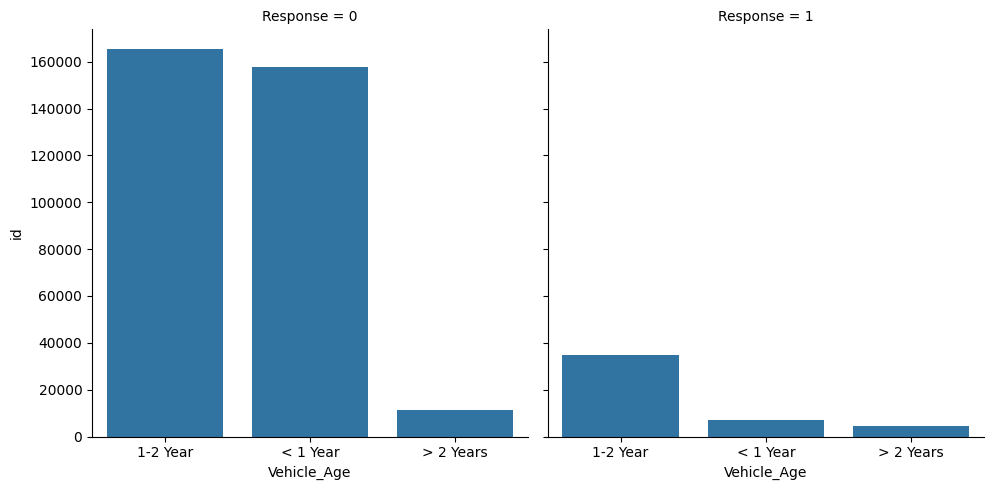

In [88]:
sns.catplot(data=df.groupby(['Vehicle_Age', 'Response'])['id'].count().to_frame(), kind='bar', x='Vehicle_Age', y='id', col='Response')

In [89]:
df['Annual_Premium'].describe()

count    381109.000000
mean      30564.389581
std       17213.155057
min        2630.000000
25%       24405.000000
50%       31669.000000
75%       39400.000000
max      540165.000000
Name: Annual_Premium, dtype: float64

<Axes: >

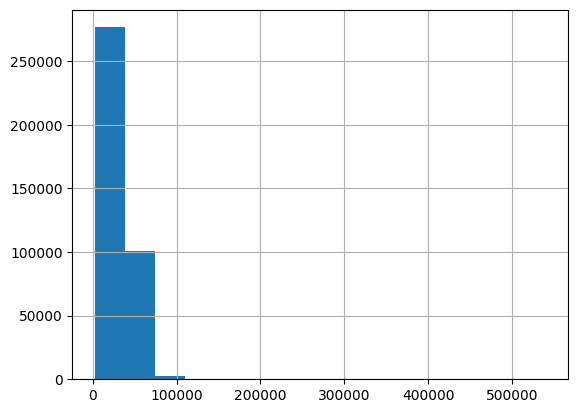

In [90]:
df['Annual_Premium'].hist(bins=15)

In [91]:
df[df["Annual_Premium"]>20000]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


# Data Pre-Processing

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [93]:
num_features = ["Age", "Vintage"]
cat_features = ["Gender", "Driving_License", "Region_Code", "Previously_Insured", "Vehicle_Age_lt_1_Year","Vehicle_Age_gt_2_Years", "Vehicle_Damage_Yes", "Policy_Sales_Channel", "Response"]

In [94]:
df["Gender"] = df["Gender"].map({'Female': 0, 'Male': 1})
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [95]:
df = pd.get_dummies(df, drop_first=True)

In [96]:
df.rename(columns=(df["Vehicle_Age_> 2 Years"]))

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,1,1,44,1,28.0,0,40454.0,26.0,217,1,False,True,True
1,2,1,76,1,3.0,0,33536.0,26.0,183,0,False,False,False
2,3,1,47,1,28.0,0,38294.0,26.0,27,1,False,True,True
3,4,1,21,1,11.0,1,28619.0,152.0,203,0,True,False,False
4,5,0,29,1,41.0,1,27496.0,152.0,39,0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,1,74,1,26.0,1,30170.0,26.0,88,0,False,False,False
381105,381106,1,30,1,37.0,1,40016.0,152.0,131,0,True,False,False
381106,381107,1,21,1,30.0,1,35118.0,160.0,161,0,True,False,False
381107,381108,0,68,1,14.0,0,44617.0,124.0,74,0,False,True,True


In [97]:
df = df.rename(columns={"Vehicle_Age_< 1 Year": "Vehicle_Age_lt_1_Year", "Vehicle_Age_> 2 Years": "Vehicle_Age_gt_2_Years"})
df['Vehicle_Age_lt_1_Year'] = df['Vehicle_Age_lt_1_Year'].astype('int')
df['Vehicle_Age_gt_2_Years'] = df['Vehicle_Age_gt_2_Years'].astype('int')
df['Vehicle_Damage_Yes'] = df['Vehicle_Damage_Yes'].astype('int')

In [98]:
for column in cat_features:
    df[column] = df[column].astype('str')

In [99]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_lt_1_Year,Vehicle_Age_gt_2_Years,Vehicle_Damage_Yes
0,1,1,44,1,28.0,0,40454.0,26.0,217,1,0,1,1
1,2,1,76,1,3.0,0,33536.0,26.0,183,0,0,0,0
2,3,1,47,1,28.0,0,38294.0,26.0,27,1,0,1,1
3,4,1,21,1,11.0,1,28619.0,152.0,203,0,1,0,0
4,5,0,29,1,41.0,1,27496.0,152.0,39,0,1,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

scaler = StandardScaler()

df[num_features] = scaler.fit_transform(df[num_features])

array([[ 0.33377727,  0.74879538],
       [ 2.39675074,  0.34244286],
       [ 0.52718104, -1.52199808],
       ...,
       [-1.14898491,  0.07950888],
       [ 1.88100737, -0.96027549],
       [ 0.46271311,  0.98782627]], shape=(381109, 2))

In [103]:
from sklearn.preprocessing import MinMaxScaler
mm_scaler = MinMaxScaler()

df['Annual_Premium'] = mm_scaler.fit_transform(df[['Annual_Premium']])

### Model Training

In [106]:
df = df.drop('id', axis=1)
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_lt_1_Year,Vehicle_Age_gt_2_Years,Vehicle_Damage_Yes
0,1,44,1,28.0,0,0.070366,26.0,217,1,0,1,1
1,1,76,1,3.0,0,0.057496,26.0,183,0,0,0,0
2,1,47,1,28.0,0,0.066347,26.0,27,1,0,1,1
3,1,21,1,11.0,1,0.048348,152.0,203,0,1,0,0
4,0,29,1,41.0,1,0.046259,152.0,39,0,1,0,0


In [112]:
df[['Age', 'Vintage']] = scaler.fit_transform(df[['Age', 'Vintage']])
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_lt_1_Year,Vehicle_Age_gt_2_Years,Vehicle_Damage_Yes
0,1,0.333777,1,28.0,0,0.070366,26.0,0.748795,1,0,1,1
1,1,2.396751,1,3.0,0,0.057496,26.0,0.342443,0,0,0,0
2,1,0.527181,1,28.0,0,0.066347,26.0,-1.521998,1,0,1,1
3,1,-1.148985,1,11.0,1,0.048348,152.0,0.581474,0,1,0,0
4,0,-0.633242,1,41.0,1,0.046259,152.0,-1.378580,0,1,0,0


In [114]:
from sklearn.model_selection import train_test_split

X = df.drop(['Response'], axis = 1)
y = df['Response']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [118]:
y_train.shape

(304887,)

In [119]:
y_test.shape

(76222,)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

random_search = {
    'criterion' : ['entropy', 'gini'],
    'min_samples_leaf' : [4, 6, 8],
    'max_depth' : [5, 10, 20],
    'min_samples_split' : [2, 5, 8],
    "n_estimators" : [200, 300, 500]
}

clf = RandomForestClassifier()

model = RandomizedSearchCV(estimator = clf, n_jobs=-1, param_distributions=random_search, n_iter=10, cv=5, verbose=1, random_state=42)

model.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
best_params = model.best_params
best_params

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report

classification_report(y_test, y_pred)

In [ ]:
import pickle

with open('rf_vehicle_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [ ]:
with open('rf_vehicle_model.pkl', 'rb') as f:
    model = pickle.load(f)